In [34]:
# Nhập dữ liệu đầu vào
x = [100,120,130,155,180,200,220,240,250,260]
y = [3,3,3,4,4,4,5,5,5,6]
z = [250,300,320,370,400,450,500,550,600,620]

In [35]:
import pandas as pd
# Tạo DataFrame từ dữ liệu
data = {'Diện tích(m2)': x, 'Số phòng ngủ': y, 'giá trị(Ngàn $)': z}
df = pd.DataFrame(data)

# Hiển thị DataFrame
print(df)


   Diện tích(m2)  Số phòng ngủ  giá trị(Ngàn $)
0            100             3              250
1            120             3              300
2            130             3              320
3            155             4              370
4            180             4              400
5            200             4              450
6            220             5              500
7            240             5              550
8            250             5              600
9            260             6              620


In [36]:
dien_tich_so_phong_ngu = df.iloc[:, :-1].values
gia_tri = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dien_tich_so_phong_ngu, gia_tri, test_size = 0.3, random_state = 0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
X_test

array([[130,   3],
       [250,   5],
       [180,   4]], dtype=int64)

In [39]:
# diện tích: 210(m2) - số phòng: 4
knn.predict([[210,4]])

array([450], dtype=int64)

In [40]:
# diện tích: 300(m2) - số phòng: 2
knn.predict([[300,2]])

array([500], dtype=int64)

In [41]:
# diện tích: 150(m2) - số phòng: 3
knn.predict([[150,3]])

array([250], dtype=int64)

   Thực tế  Dự đoán
0      320      250
1      600      500
2      400      370


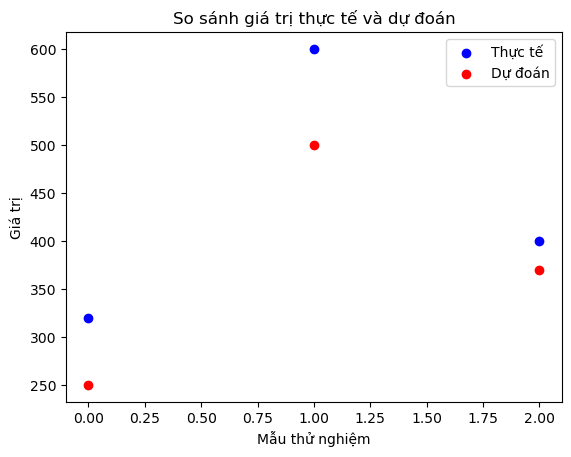

In [47]:
import matplotlib.pyplot as plt

# Dự đoán giá trị trên tập test
y_pred = knn.predict(X_test)

# Tạo DataFrame mới chứa giá trị thực tế và dự đoán
df_result = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred})

# In kết quả
print(df_result)

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.scatter(range(len(y_test)), y_test, color='blue', label='Thực tế')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Mẫu thử nghiệm')
plt.ylabel('Giá trị')
plt.legend()
plt.show()
